In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Introduction and Data Preparation:
This dataset describes various different statistics for over 12,000 bottles of wine including their acidity, pH value, density, and star rating ranging between 1 and 4. This data set can be used to try and predict the amount of wine bottles sold which is listed as "TARGET" here. To be able to do this, the dataset must be cleaned as there are many missing values among the various columns but before we can even begin to do that, we must organize the dataset into a format which is usable. To summarize the steps taken below, first the dataset is loaded from github, then the first column is removed since pandas provides its own row numbers so there's no need to list it twice. The basic descriptive statistics of the dataset are also listed, 16 columns, 12,795 rows, 6,359 observations have missing values, meaning that just under 50% of observation have at least one value missing. Since this is such a large number, it's not an option to just remove any rows missing data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/askidelsky/DAV-6150/main/Data%20Sets/Module%203/M3_Data%20(1).csv')
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [3]:
#get rid of unnamed column, no need for line numbers when pandas provides automatically
df1 = df.iloc[:,1:]
df1.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


### Exploratory Data Analysis: Profiling the Data
Before delving into the data at hand, it's crucial to note the scope of the dataset. As stated above, there are 16 columns (14 explanatory variables, one predictor variable, and one identifier), 12,795 total observations, 6,359 observations with missing values, and 8,200 missing values scattered throughout the dataset. This amounts to slightly less than 50% of the total observations and because of this the strategy for data cleaning that involves just removing the problematic observations since that is nearly half of all observations. Additionally, it's important to notice that all variables are numeric but even so, INDEX, STARS, and LabelAppeal are categorical although INDEX is nominal and the other two are ordinal so can have similar replacement values applied to them as regular continuous variables. 

In [21]:
amt = 0
for i in range(len(df)):
    if df.loc[[i]].isna().sum().sum() > 0:
        amt += 1

print('Columns: ', len(df1.columns))
print('Total Amount of Missing Values: ', df1.isna().sum().sum())
print('Observations with Missing Values: ',amt)
print('Total Observations: ', len(df1))
print('Percentage Observations with Missing Values: ', round(100*(amt/len(df1)), 3),'%')

Columns:  16
Total Amount of Missing Values:  8200
Observations with Missing Values:  6359
Total Observations:  12795
Percentage Observations with Missing Values:  49.699 %


In [10]:
#all fields are numeric and are eligible for the replacement method of dealing with missing values
types = {}
for i in range(len(df1.columns)):
    types[df1.columns[i]] = type(df1.iloc[0,i])
types

{'INDEX': numpy.int64,
 'TARGET': numpy.int64,
 'FixedAcidity': numpy.float64,
 'VolatileAcidity': numpy.float64,
 'CitricAcid': numpy.float64,
 'ResidualSugar': numpy.float64,
 'Chlorides': numpy.float64,
 'FreeSulfurDioxide': numpy.float64,
 'TotalSulfurDioxide': numpy.float64,
 'Density': numpy.float64,
 'pH': numpy.float64,
 'Sulphates': numpy.float64,
 'Alcohol': numpy.float64,
 'LabelAppeal': numpy.int64,
 'AcidIndex': numpy.int64,
 'STARS': numpy.float64}

### Exploratory Data Analysis: Distribution and Correlation of the Variables
Two notes before diving into information derived from the EDA, first off this is done before editing any problematic observations, this will show to have an extreme effect on the results on typical EDA methods. Second, I removed the INDEX column from all analysis since it's just an arbitrary identifier and should have no effect on the results of any machine learning algorithm applied. Looking at the descriptive statistics below, it's interesting to note that all variables have relatively low standard deviations.

In [24]:
df1.iloc[:,1:].describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


The boxplot below is an extremely abnormal display of these statistics. Based on the amount of dots outside of the boxes, it seems that there are a lot more outliers than not. Additionally, each variable has a tiny range with only ResidualSugar, FreeSulfurDioxide, and TotalSulfurDioxide having truly visible boxes to even make any sort of analysis on. Both of these phenomena can most likely be attributed to the large of missing values in the data set.

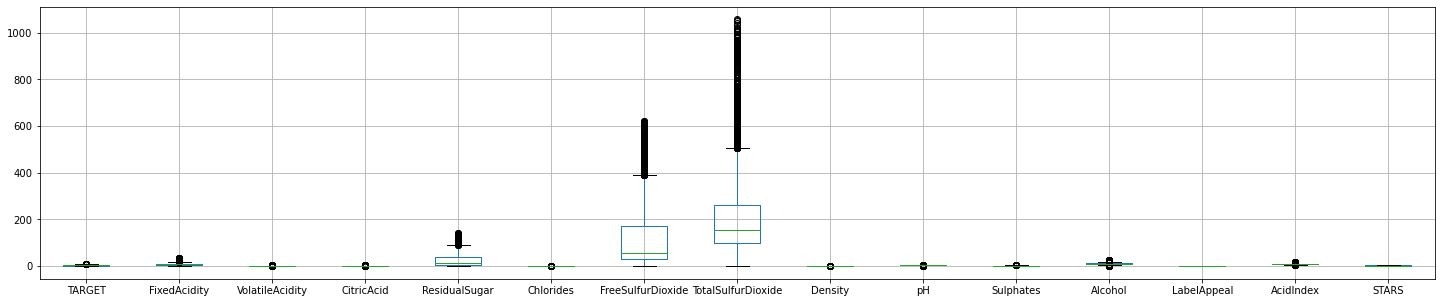

In [32]:
boxplot= df1.iloc[:,1:].boxplot(figsize=(25,5))

Note the distributions shown by these histograms. Assuming that this dataset is diverse to contain observations of all sales levels, I would expect more of the variables, at least the important ones, to have normal distributions. The fact that TARGET has a relatively normal distribution is indicative of the fact that it is somewhat of a diverse dataset. However, only five out of the remaining 14 variables have even close to normal distributions. It could be that I am not well versed enough in wine to make sense of this but I would expect more to be closer to normal. STARS could possibly be considered normal except it doesn't show any values for 2.5. This extremely surprising since out of a sample of close to 12,800 bottles not a single one is rated 2.5? I think that again this phenomenon can be attributed to the surplus of missing data.

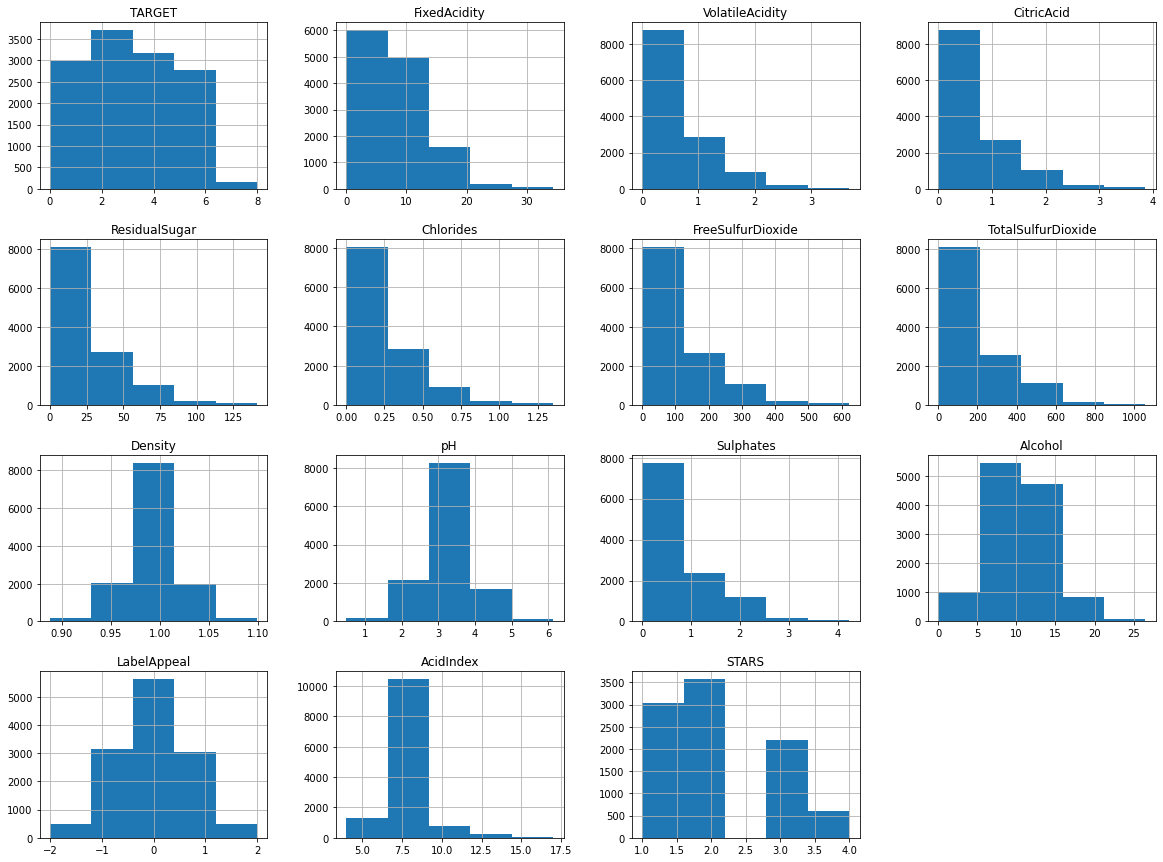

In [25]:
df1.iloc[:,1:].hist(bins = 5, figsize = (20,15))
plt.show()

Looking at the correlation matrix, this is also very troubling and likely a product of the missing data. None of these values are high enough that I would feel comfortable calling them good predictors in their present form. In fact, the closest result by far is still only approximately 56%. Hopefully this will be resolved as the data is cleaned.

In [31]:
corr = df1.corr()
corr['TARGET'].sort_values(ascending=False)

TARGET                1.000000
STARS                 0.558794
LabelAppeal           0.356500
Alcohol               0.063394
TotalSulfurDioxide    0.035253
FreeSulfurDioxide     0.024503
CitricAcid            0.013953
ResidualSugar         0.003645
INDEX                 0.001256
pH                   -0.009445
Chlorides            -0.028463
Sulphates            -0.035259
Density              -0.035518
FixedAcidity         -0.052984
VolatileAcidity      -0.070195
AcidIndex            -0.246049
Name: TARGET, dtype: float64

### Exploratory Data Analysis: Scope of Missing Data
Before cleaning the data it is important to know just how the missing values fall out. As can be seen below, there are eight variables with significant amount of missing values, with STARS leading the way by a troubling amount, a chart below shows a visual of a steep drop off in existing values once we get to STARS. For a couple other analysis points I felt it was important to create a smaller table of just the variables with missing values and I again showed the descriptive statistics as before. Based on the amount of missing values with STARS leading the way by a large margin, you may think that it may just be easier to remove the column as it isn't relavent but after reading the data dictionary I feel that it's important to keep especially since it had the highest correlation score while having the most missing values.

In [8]:
nas = {}
for i in range(len(df1.columns)):
    if df1.iloc[:,i].isna().sum() > 0:
        nas[df1.columns[i]] = df1.iloc[:,i].isna().sum()
nas

{'ResidualSugar': 616,
 'Chlorides': 638,
 'FreeSulfurDioxide': 647,
 'TotalSulfurDioxide': 682,
 'pH': 395,
 'Sulphates': 1210,
 'Alcohol': 653,
 'STARS': 3359}

In [11]:
dfNa = df1[['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']]
dfNa.head()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
0,54.2,0.567,NaN,268.0,3.33,0.59,9.9,2.0
1,26.1,0.425,15.0,327.0,3.38,0.70,NaN,3.0
2,14.8,0.037,214.0,142.0,3.12,0.48,22.0,3.0
3,18.8,0.425,22.0,115.0,2.24,1.83,6.2,1.0
4,9.4,NaN,167.0,108.0,3.12,1.77,13.7,2.0


In [14]:
countNas = dfNa.describe().iloc[0,:].sort_values(ascending = False)
countNas

pH                    12400.0
ResidualSugar         12179.0
Chlorides             12157.0
FreeSulfurDioxide     12148.0
Alcohol               12142.0
TotalSulfurDioxide    12113.0
Sulphates             11585.0
STARS                  9436.0
Name: count, dtype: float64

In [12]:
dfNa.describe()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
count,12179.000000,12157.000000,12148.000000,12113.000000,12400.000000,11585.000000,12142.000000,9436.000000
mean,23.367809,0.222559,106.679042,204.319120,3.207628,0.846668,10.523778,2.041755
std,24.945667,0.234288,108.102694,163.116881,0.679687,0.655612,3.629154,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.480000,0.000000,0.000000,1.000000
25%,3.600000,0.046000,28.000000,100.000000,2.960000,0.430000,9.000000,1.000000
50%,12.900000,0.098000,56.000000,154.000000,3.200000,0.590000,10.400000,2.000000
75%,38.700000,0.368000,172.000000,262.000000,3.470000,1.100000,12.400000,3.000000
max,141.150000,1.351000,623.000000,1057.000000,6.130000,4.240000,26.500000,4.000000


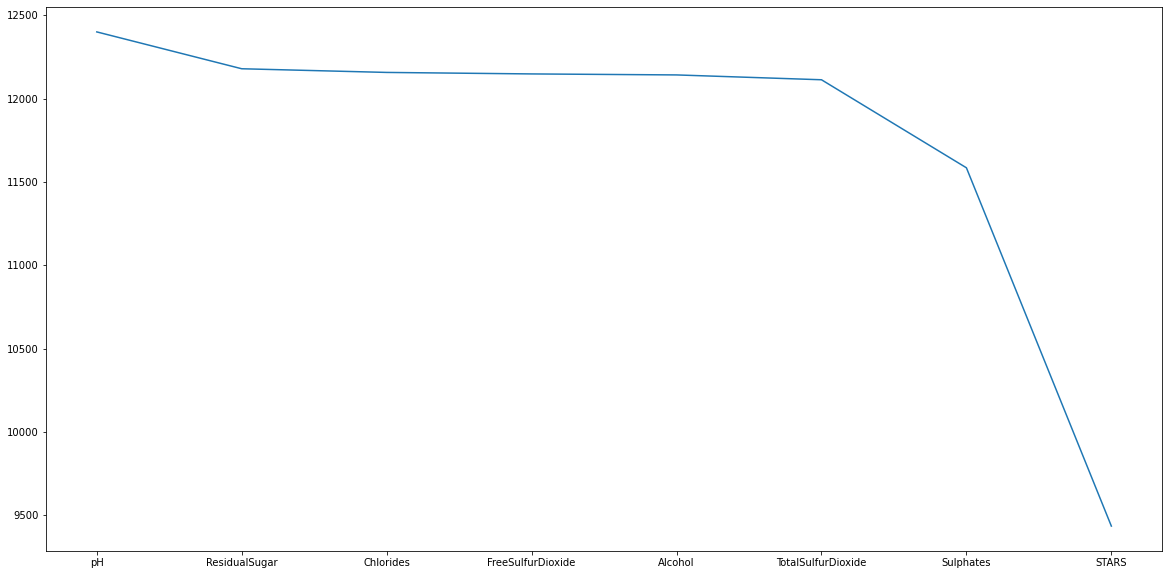

In [16]:
countNas.plot(figsize = (20,10))
plt.show()